In [1]:
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
data = loadmat('./dataset/ex3data1.mat')

In [5]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [43]:
X = data['X']
y = data['y']

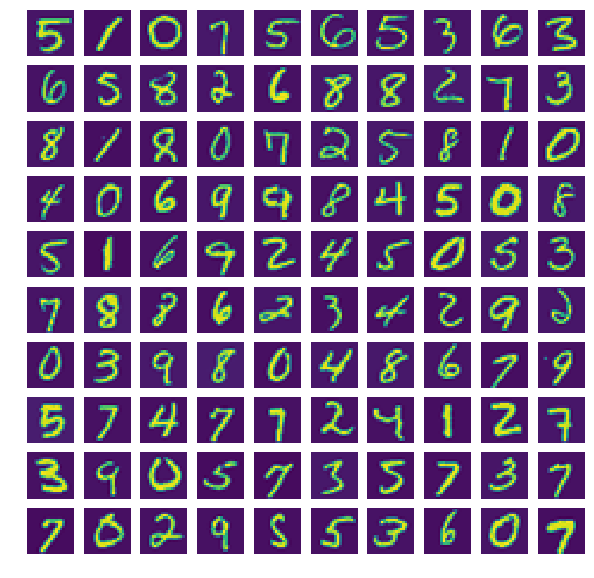

In [44]:
fig, arr = plt.subplots(10,10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        arr[i][j].imshow(X[np.random.randint(X.shape[0])].reshape((20,20),order = 'F') )
        arr[i][j].axis('off')

In [45]:
m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones, X)) #add the intercept
(m,n) = X.shape

In [46]:
X.shape

(5000, 401)

In [38]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [39]:
def computeCost(theta,X,y,lambda_term):
    # = (-1/m)*np.sum(np.multiply(y,np.log(sigmoid(np.dot(X,theta))))+np.multiply((1-y),np.log(1-sigmoid(np.dot(X,theta))))) #temp.shape = (506, 1), y.shape =  (506, 1)
    first = np.multiply(y, np.log(sigmoid(np.dot(X,theta))))
    second = np.multiply((1 - y), np.log(1 - sigmoid(np.dot(X,theta))))
    J = (-1/m)*np.sum(first + second)
    #print(J)
    reg = (lambda_term/(2*m)) * np.dot(theta[1:].T,theta[1:]) #theta0 need not be regularized
    J = J + reg
    return J

In [40]:
def gradient(theta,X,y,lambda_term):
    m = len(y)
    grad = np.zeros((m,1))
    grad = (1/m)*np.dot(X.T,sigmoid(np.dot(X,theta))-y)
#     print(np.dot(X.T,sigmoid(np.dot(X,theta))-y).shape)
#     print((np.dot(X,theta)-y).shape)
#     print(np.dot(X,theta).shape)
#     print(grad.shape)
    grad[1:] = grad[1:] + ((lambda_term/m)*theta[1:])
    return grad

In [89]:
#initial cost
lambda_term = 0.1
k = 10 #since 10 digits to classify
theta = np.zeros((k,n)) # for each digit we have n features -----dimension of theta is designed based on dimension of X

In [90]:
for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = computeCost, x0 = theta[i],  fprime = gradient, args = (X, (y == digit_class).flatten(), lambda_term))

Optimization terminated successfully.
         Current function value: 0.008578
         Iterations: 104
         Function evaluations: 406
         Gradient evaluations: 406
Optimization terminated successfully.
         Current function value: 0.013126
         Iterations: 101
         Function evaluations: 393
         Gradient evaluations: 393
Optimization terminated successfully.
         Current function value: 0.050803
         Iterations: 252
         Function evaluations: 769
         Gradient evaluations: 769
Optimization terminated successfully.
         Current function value: 0.057613
         Iterations: 292
         Function evaluations: 868
         Gradient evaluations: 868
Optimization terminated successfully.
         Current function value: 0.033070
         Iterations: 180
         Function evaluations: 591
         Gradient evaluations: 591
Optimization terminated successfully.
         Current function value: 0.054478
         Iterations: 192
         Function ev

Here index of the dot produc corresponds to the digit classifier. eg 0 corresponds to digit 0. It fetches the index for the max value corresponding to the input feature index

In [81]:
pred = np.argmax(X @ theta.T, axis = 1) # fethches the index for the max value, axis = 1 corresponds to columns

In [82]:
pred.shape

(5000,)

In [83]:
pred

array([0, 0, 0, ..., 9, 9, 7], dtype=int64)

In [84]:
pred = [e if e else 10 for e in pred]

In [86]:
np.mean(pred == y.flatten()) * 100

96.46000000000001